In [3]:
import pandas as pd

import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [21]:
# reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)
whale_returns_df.head()





,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [22]:
#count null
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [ ]:
#drop nulls

In [25]:
whale_retures_df = whale_returns_df.dropna()

In [27]:
#reading algo returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [28]:
#count nulls
algo_returns_df.isnull().mean() *100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [29]:
#drop_nulls
algo_returns_df = algo_returns_df.dropna()

In [33]:
#reading s&p 500
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df['Date'] = pd.to_datetime(sp500_history_df["Date"], dayfirst = True)
sp500_history_df.set_index(sp500_history_df['Date'], inplace=True)
sp500_history_df.drop(columns=['Date'],inplace=True)
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']
sp500_history_df = sp500_history_df.sort_values("Date", ascending=True)
sp500_history_df.head()


<ipython-input-33-83c4fd238ebd>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [34]:
sp500_history_df.dtypes

Close    object
dtype: object

In [35]:
#fix data
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype

dtype('float64')

In [36]:
#calculate Daily Retures
sp500_history_df.isnull().sum()
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [37]:
#drop nulls
sp500_returns_df.pct_change
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [38]:
#rename coloum
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P500"})
sp500_returns_df.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [39]:
#combine all reture
combined_portfolios_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df], axis='columns', join='inner')
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

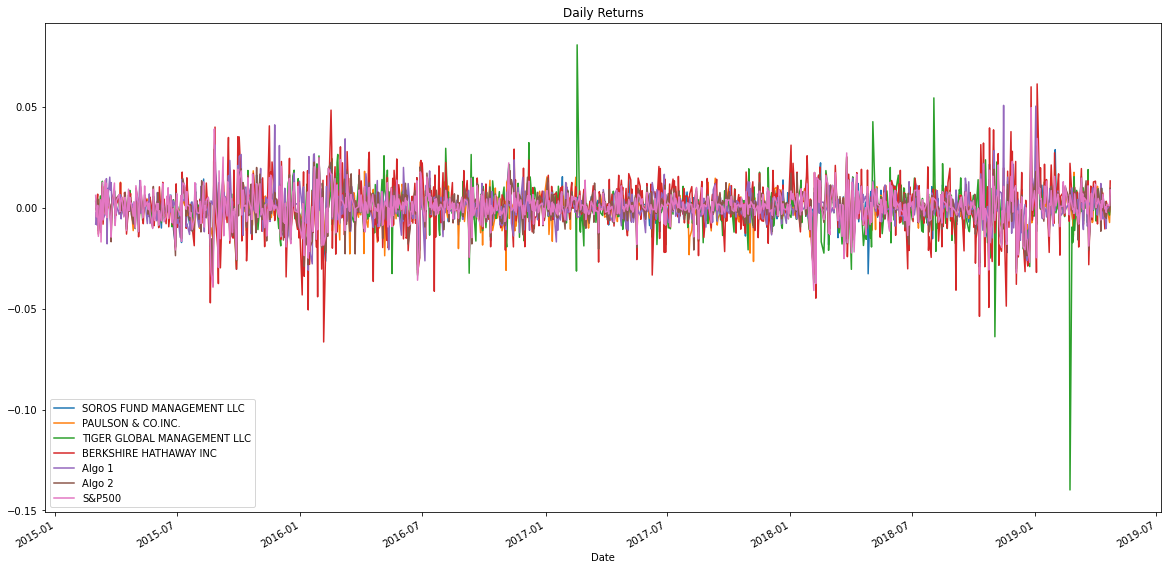

In [40]:
#plot daily retures
combined_portfolios_df.plot( title="Daily Returns" , figsize=(20,10))

<AxesSubplot:xlabel='Date'>

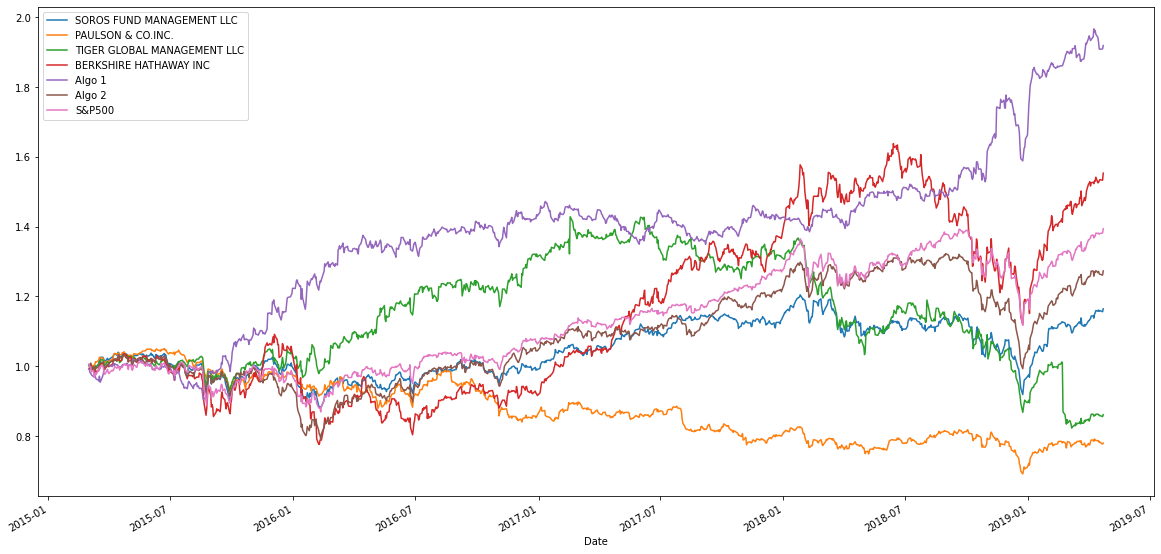

In [41]:
#cumulative returns
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

<AxesSubplot:title={'center':'Portfolio Risk'}>

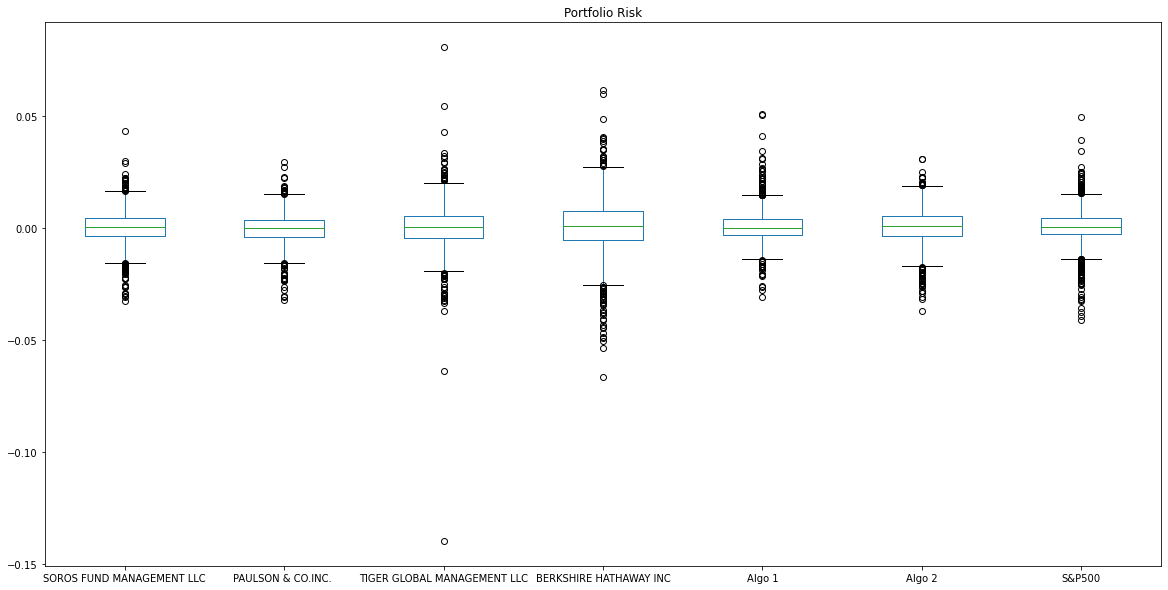

In [42]:
#vusal show risk
combined_portfolios_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

In [43]:
#daily standard deviation
daily_std = combined_portfolios_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008551
Algo 2                         0.008339
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007621
PAULSON & CO.INC.              0.007023
dtype: float64

In [44]:
#risker than S&p500
portfolios_riskier_than_SP500 =[daily_std > daily_std['S&P500']]
portfolios_riskier_than_SP500

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 S&P500                         False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

In [45]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135751
Algo 2                         0.132374
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120987
PAULSON & CO.INC.              0.111488
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

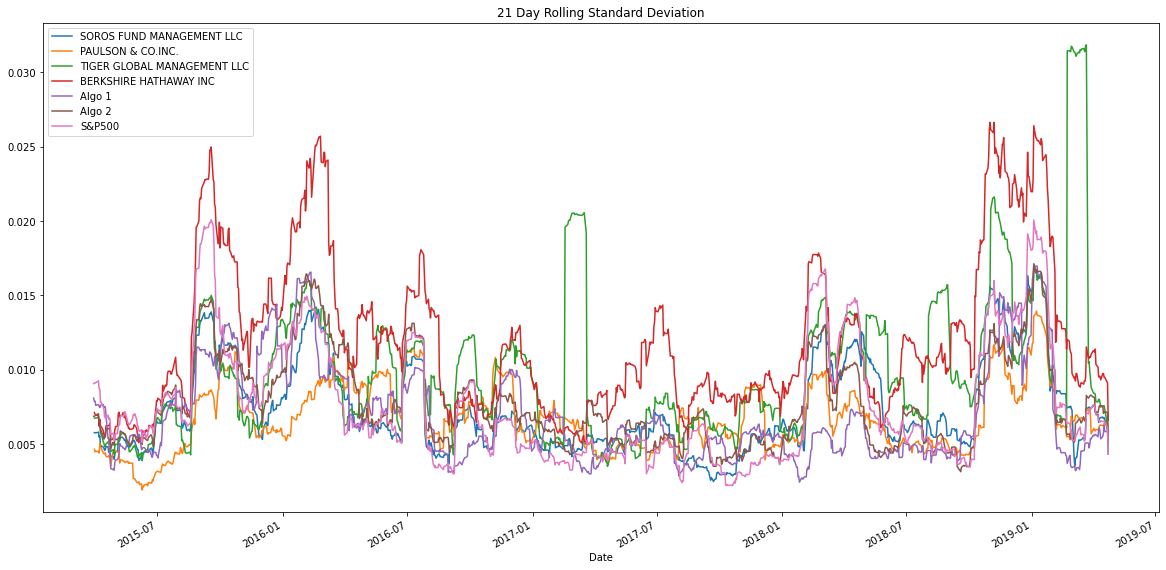

In [46]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_portfolios_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

In [47]:
# Construct a correlation table
correlation = combined_portfolios_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,0.278505
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,0.858753
S&P500,0.837864,0.669732,0.623946,0.751371,0.278505,0.858753,1.000000


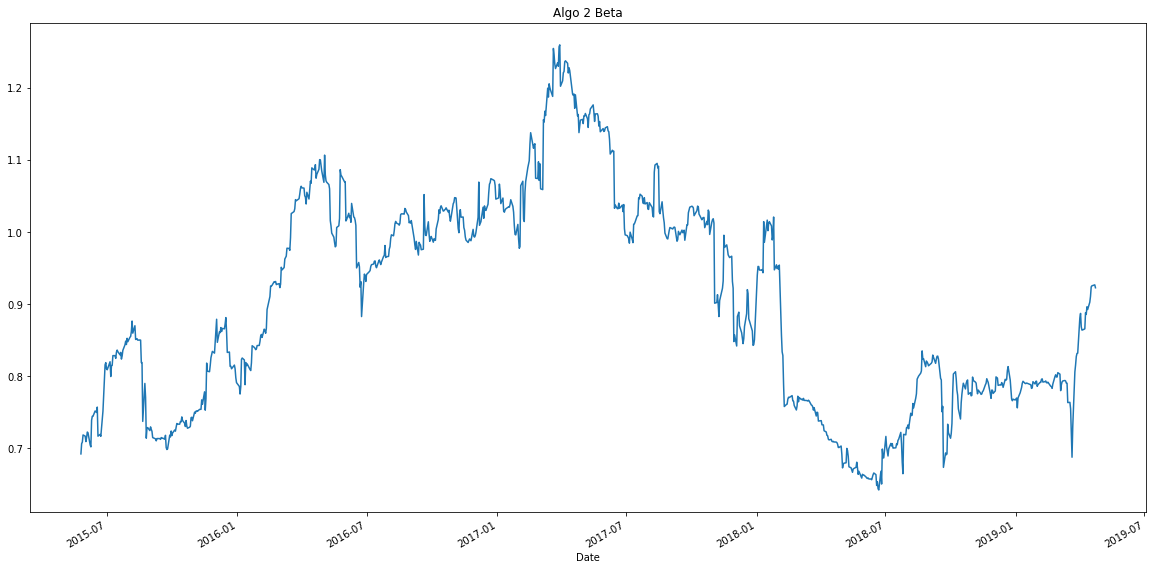

In [48]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# Calculate covariance of all daily returns vs. S&P 500
algo_2_covariance = combined_portfolios_df['Algo 2'].rolling(window=60).cov(combined_portfolios_df['S&P500'])
algo_2_covariance
# Calculate variance of all daily returns vs. S&P 500
variance = combined_portfolios_df['S&P500'].rolling(window=60).var()
variance
# Calculate beta of all daily returns 
algo_2_beta = algo_2_covariance / variance
algo_2_beta_plot = algo_2_beta.plot(title="Algo 2 Beta", figsize=(20, 10))

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

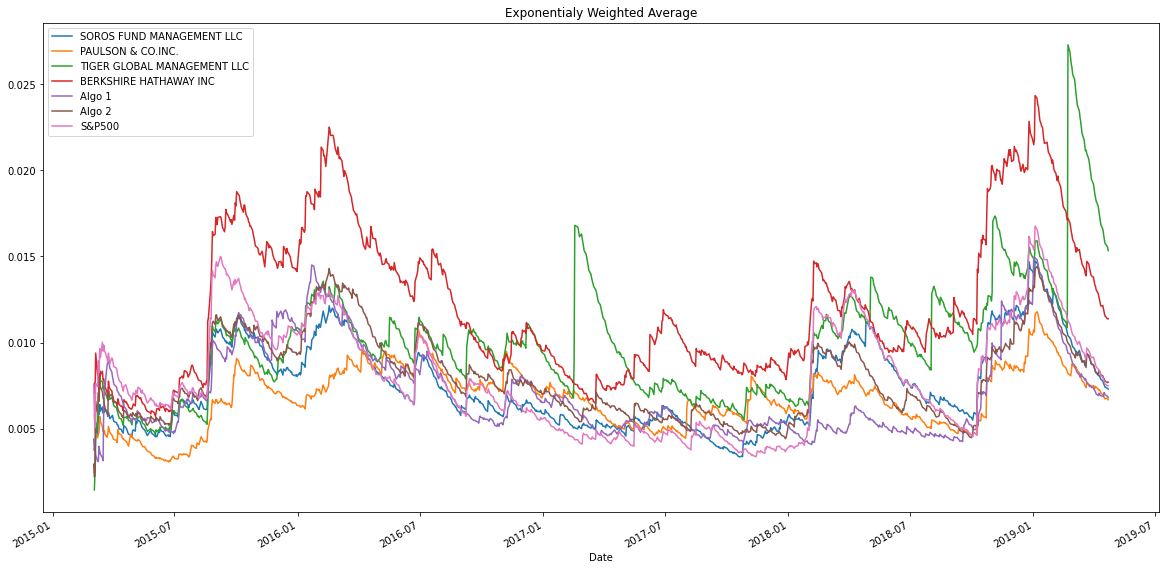

In [49]:
# Calculate a rolling window using the exponentially weighted moving average. 
#rolling_window_ewma = combined_portfolios_df.rolling(window=100).mean().plot(figsize=(20, 10))
rolling_window_ewma = combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

In [50]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
S&P500                         0.658706
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

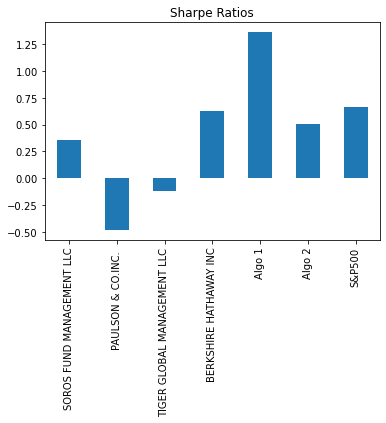

In [53]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")



In [113]:
goog_csv = Path("Resources/Goog.csv")
goog_df = pd.read_csv(goog_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
goog_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-14,1515.660034,1521.900024,1502.880005,1507.729980,1507.729980,1354800
2020-08-17,1514.670044,1525.609985,1507.969971,1517.979980,1517.979980,1378300
2020-08-18,1526.180054,1562.469971,1523.709961,1558.599976,1558.599976,2027100
2020-08-19,1553.310059,1573.680054,1543.949951,1547.530029,1547.530029,1660600
2020-08-20,1543.449951,1585.869995,1538.199951,1581.750000,1581.750000,1706900


In [115]:
# Read the second stock
aapl_csv = Path("Resources/aapl.csv")
aapl_df = aapl_df = pd.read_csv(aapl_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
aapl_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-16,135.490005,136.009995,132.789993,133.190002,132.765244,80576300
2021-02-17,131.250000,132.220001,129.470001,130.839996,130.422729,97918500
2021-02-18,129.199997,130.000000,127.410004,129.710007,129.296326,96856700
2021-02-19,130.240005,130.710007,128.800003,129.869995,129.455826,87668800
2021-02-22,128.009995,129.720001,125.599998,126.000000,125.598167,103916400


In [93]:
cost_csv = Path("Resources/cost.csv")
cost_df = aapl_df = pd.read_csv(cost_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
cost_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-16,353.079987,355.359985,352.040009,354.000000,352.582397,1829000
2021-02-17,353.109985,358.170013,351.910004,358.040009,356.606201,2143000
2021-02-18,352.279999,358.200012,352.279999,356.920013,355.490723,1914900
2021-02-19,356.690002,357.929993,354.579987,354.769989,353.349304,1839400
2021-02-22,352.750000,353.290009,348.820007,350.209991,348.807556,2215600


In [101]:
# Concatenate all stocks into a single DataFrame
my_portfolio_combined_df = pd.concat([goog_df, aapl_df, cost_df], axis="columns",  join="inner")
my_portfolio_combined_df
# Sort datetime index in ascending order (past to present)
my_portfolio_combined_df.sort_index(inplace=True)
# Set column names
my_portfolio_combined_df.closecolumns = ['goog','aapl','cost']
# Display a few rows
my_portfolio_combined_df.head()



<ipython-input-101-aa71a1dd3aa8>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  my_portfolio_combined_df.closecolumns = ['goog','aapl','cost']


,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,
2021-02-16,2104.360107,2152.679932,2104.360107,2121.899902,2121.899902,1133800,353.079987,355.359985,352.040009,354.000000,352.582397,1829000,353.079987,355.359985,352.040009,354.000000,352.582397,1829000
2021-02-17,2100.000000,2133.659912,2098.919922,2128.310059,2128.310059,1070900,353.109985,358.170013,351.910004,358.040009,356.606201,2143000,353.109985,358.170013,351.910004,358.040009,356.606201,2143000
2021-02-18,2110.389893,2132.735107,2103.709961,2117.199951,2117.199951,1121600,352.279999,358.200012,352.279999,356.920013,355.490723,1914900,352.279999,358.200012,352.279999,356.920013,355.490723,1914900
2021-02-19,2119.270020,2130.530029,2097.409912,2101.139893,2101.139893,1457400,356.690002,357.929993,354.579987,354.769989,353.349304,1839400,356.690002,357.929993,354.579987,354.769989,353.349304,1839400
2021-02-22,2067.000000,2091.419922,2062.139893,2064.879883,2064.879883,1367500,352.750000,353.290009,348.820007,350.209991,348.807556,2215600,352.750000,353.290009,348.820007,350.209991,348.807556,2215600


In [102]:
# Drop Nulls
my_portfolio_combined_df.dropna()
my_portfolio_combined_df
my_portfolio_combined_returns = my_portfolio_combined_df.pct_change()
my_portfolio_combined_returns.dropna(inplace=True)
my_portfolio_combined_returns.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,
2021-02-17,-0.002072,-0.008836,-0.002585,0.003021,0.003021,-0.055477,0.000085,0.007908,-0.000369,0.011412,0.011412,0.171679,0.000085,0.007908,-0.000369,0.011412,0.011412,0.171679
2021-02-18,0.004948,-0.000433,0.002282,-0.005220,-0.005220,0.047343,-0.002351,0.000084,0.001051,-0.003128,-0.003128,-0.106440,-0.002351,0.000084,0.001051,-0.003128,-0.003128,-0.106440
2021-02-19,0.004208,-0.001034,-0.002995,-0.007586,-0.007586,0.299394,0.012518,-0.000754,0.006529,-0.006024,-0.006024,-0.039428,0.012518,-0.000754,0.006529,-0.006024,-0.006024,-0.039428
2021-02-22,-0.024664,-0.018357,-0.016816,-0.017257,-0.017257,-0.061685,-0.011046,-0.012963,-0.016245,-0.012853,-0.012853,0.204523,-0.011046,-0.012963,-0.016245,-0.012853,-0.012853,0.204523
2021-02-23,-0.020314,-0.004499,-0.029154,0.002896,0.002896,0.219305,-0.008363,-0.006482,-0.019466,-0.023015,-0.023015,0.666637,-0.008363,-0.006482,-0.019466,-0.023015,-0.023015,0.666637


ValueError: Dot product shape mismatch, (124, 18) vs (3,)

In [108]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_portfolios_2_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df, my_portfolio_weighted_returns], axis='columns', join='inner')
combined_portfolios_2_df.head()

NameError: name 'my_portfolio_weighted_returns' is not defined